In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/p.kuznetsov/runaway


In [2]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.94 🚀 Python-3.9.7 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
Setup complete ✅ (20 CPUs, 62.5 GB RAM, 200.0/227.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="T3E2M8jPKMaklrg9Ouoq")
project = rf.workspace("runaway").project("cats-bfpvf")
version = project.version(13)
dataset = version.download("yolov8-obb", location="./seg-data")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ./seg-data in yolov8-obb:: 100%|███████████████| 1264/1264 [00:00<00:00, 12667.16it/s]


In [4]:

from roboflow import Roboflow
rf = Roboflow(api_key="T3E2M8jPKMaklrg9Ouoq")
project = rf.workspace("runaway").project("cats-bfpvf")
version = project.version(13)
dataset = version.download("coco", location="./coco-bounding")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ./coco-bounding in coco:: 100%|███████████████████| 633/633 [00:00<00:00, 9575.66it/s]


In [7]:
from ultralytics.data.converter import convert_coco

convert_coco(labels_dir="./coco-bounding/train")

Annotations /home/p.kuznetsov/runaway/coco-bounding/train/_annotations.coco.json: 100%|██████████| 428/428 [00:00<00:00,

COCO data converted successfully.
Results saved to /home/p.kuznetsov/runaway/coco_converted


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="T3E2M8jPKMaklrg9Ouoq")
project = rf.workspace("runaway").project("cats-bfpvf")
version = project.version(13)
dataset = version.download("yolov8", location="./bounding-box")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ./bounding-box in yolov8:: 100%|███████████████| 1264/1264 [00:00<00:00, 13368.77it/s]


In [12]:
!mkdir {HOME}/roboflow_datasets
%cd {HOME}/roboflow_datasets

from roboflow import Roboflow
rf = Roboflow(api_key="T3E2M8jPKMaklrg9Ouoq")
project = rf.workspace("runaway").project("cats-bfpvf")
version = project.version(13)
dataset = version.download("yolov8-obb")
                

mkdir: cannot create directory ‘/home/p.kuznetsov/runaway/roboflow_datasets’: File exists
/home/p.kuznetsov/runaway/roboflow_datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cats-13 in yolov8-obb:: 100%|██████████████████| 1264/1264 [00:00<00:00, 13919.71it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=200 imgsz=500

In [1]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=./cropped_roboflow5-224/data.yaml epochs=400 imgsz=224

/home/p.kuznetsov/runaway/venv/lib/python3.9/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='c

: 

In [5]:
!ls runs/segment/train32

args.yaml					      train_batch0.jpg
events.out.tfevents.1726090946.bakuparsec16.418766.0  train_batch1.jpg
labels_correlogram.jpg				      train_batch2.jpg
labels.jpg					      weights
results.csv


In [10]:
%cd {HOME}
Image(filename=f'runs/segment/train32/confusion_matrix.png', width=600)

/home/p.kuznetsov/runaway


/home/p.kuznetsov/runaway/venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


FileNotFoundError: [Errno 2] No such file or directory: 'runs/segment/train32/confusion_matrix.png'

/home/p.kuznetsov/runaway


/home/p.kuznetsov/runaway/venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


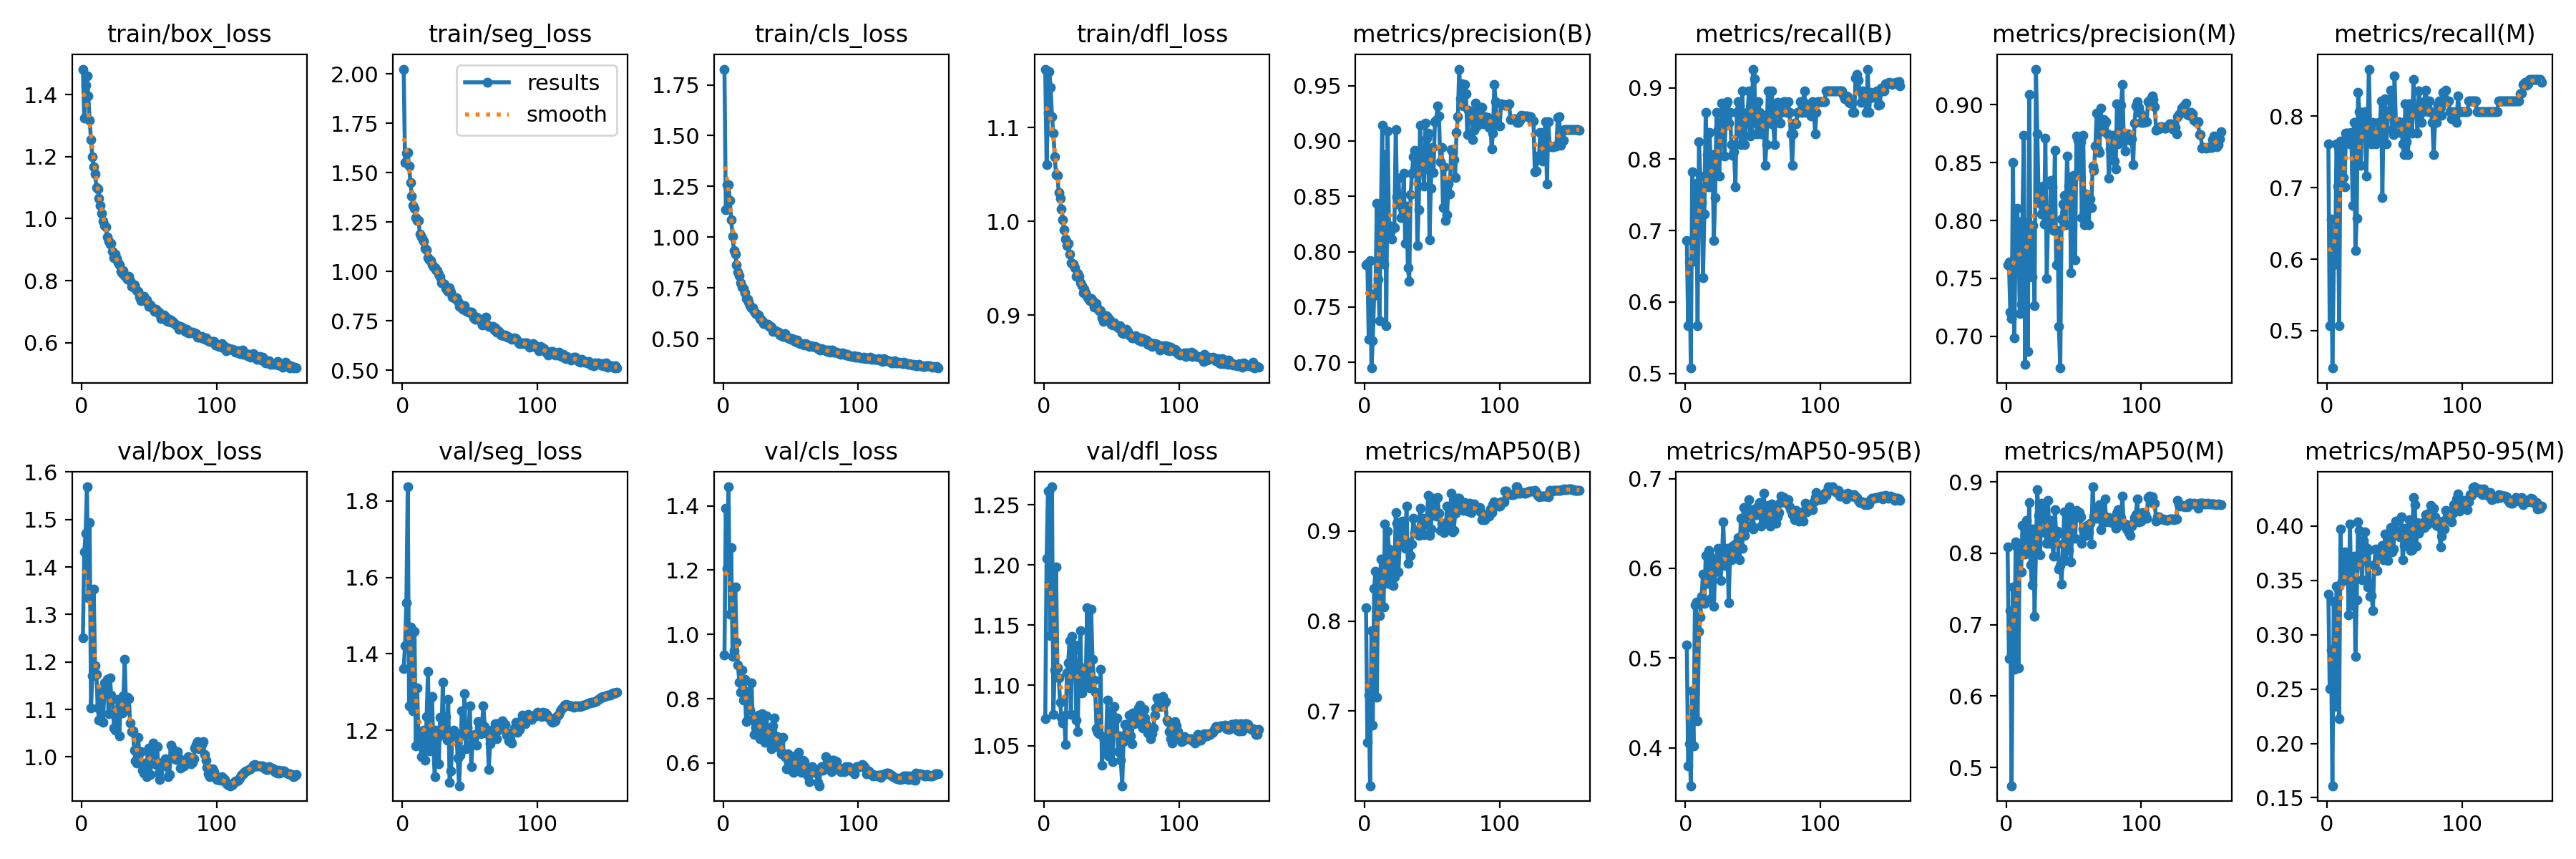

In [5]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train35/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train23/val_batch0_pred.jpg', width=600)

In [ ]:
!ls

## Validate Custom Model

In [ ]:
!yolo task=segment mode=val model=./runs/segment/train22/weights/best.pt data=./cropped_roboflow2/data.yaml
!yolo task=segment mode=val model=./runs/segment/train23/weights/best.pt data=./cropped_roboflow2/data.yaml
!yolo task=segment mode=val model=./runs/segment/train24/weights/best.pt data=./cropped_roboflow2/data.yaml
!yolo task=segment mode=val model=./runs/segment/train25/weights/best.pt data=./cropped_roboflow2/data.yaml
!yolo task=segment mode=val model=./runs/segment/train29/weights/best.pt data=./cropped_roboflow2/data.yaml

In [7]:
!yolo task=segment mode=val model=./runs/segment/train35/weights/best.pt data=./cropped_roboflow2/data.yaml
!yolo task=segment mode=val model=./runs/segment/train36/weights/best.pt data=./cropped_roboflow2/data.yaml
!yolo task=segment mode=val model=./runs/segment/train35/weights/best.pt data=./cropped_roboflow5-224/data.yaml
!yolo task=segment mode=val model=./runs/segment/train36/weights/best.pt data=./cropped_roboflow5-224/data.yaml

/home/p.kuznetsov/runaway/venv/lib/python3.9/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='c

## Inference with Custom Model

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and using later.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train17/")